In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_curve, confusion_matrix, plot_confusion_matrix

from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
DATA_DIR = '../data/'
FILENAME = 'AllDiscussionDataCODED_USE_THIS_14Feb2020_MH.xls'

data = pd.read_excel( io = DATA_DIR + FILENAME ).dropna( ( 'index', 'columns' ), 'all' )
data = data.reset_index()

/home/domen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  after removing the cwd from sys.path.


In [22]:
data.drop( data[ pd.isna( data[ 'Message' ] ) == True ].index, inplace = True ) # remove rows with empty message
data.drop( data[ pd.isna( data[ 'Book relevance' ] ) == True ].index, inplace = True ) # remove rows with unknown book relevance

# print( len( data[ pd.isna( data[ 'Message' ] ) == True ] ) )
# print( len( data[ pd.isna( data[ 'Book relevance' ] ) == True ] ) )
X_train, X_test, y_train, y_test = train_test_split( data[ 'Message' ], data[ 'Book relevance' ], random_state = 42 )

In [4]:
x_relevant = len( X_train[ ( data[ 'Book relevance' ] == 'Yes' ) ] )
x_nonrelevant = len( X_train[ ( data[ 'Book relevance' ] == 'No' ) ] )
testNonRelevant = len( X_test[ ( data[ 'Book relevance' ] == 'No' ) ] )
print( 'Book relevant texts in training set: {0}'.format( x_relevant ) )
print( 'Book non-relevant texts in training set: {0}'.format( x_nonrelevant ) )
print( 'Baseline classifier accuracy on training set: {0}'.format( x_nonrelevant / len( X_train ) ) )
print( 'Baseline classifier accuracy on test set: {0}'.format( testNonRelevant / len( X_test ) ) )

Book relevant texts in training set: 1047
Book non-relevant texts in training set: 1606
Baseline classifier accuracy on training set: 0.605352431209951
Baseline classifier accuracy on test set: 0.6192090395480226


In [25]:
cv = CountVectorizer( ngram_range=( 1, 3 ) )

X_train = np.array( [ value for value in X_train ], dtype = str )
y_train = np.array( [ value for value in y_train ], dtype = str )

X_test = np.array( [ value for value in X_test ], dtype = str )
y_test = np.array( [ value for value in y_test ], dtype = str )

# X_train_cv = cv.fit_transform( X_train.values.astype( 'U' ) )
# X_test_cv = cv.transform( X_test.values.astype( str ) )

X_train_cv = cv.fit_transform( X_train )
X_test_cv = cv.transform( X_test )

# word_freq_df = pd.DataFrame( X_train_cv.toarray(), columns = cv.get_feature_names() )
# top_words_df = pd.DataFrame( word_freq_df.sum() ).sort_values( 0, ascending = False )
# print( top_words_df )

Accuracy score of Naive Bayes:  0.848587570621469
Precision score of Naive Bayes:  0.8181818181818182
Recall score of Naive Bayes:  0.7744807121661721

Accuracy score of Logistic Regression:  0.8576271186440678
Precision score of Logistic Regression:  0.8864468864468864
Recall score of Logistic Regression:  0.7181008902077152


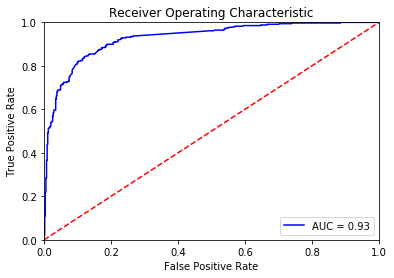

In [30]:
positiveLabel = 'Yes'

naive_bayes = MultinomialNB()
naive_bayes.fit( X_train_cv, y_train )
predictions = naive_bayes.predict( X_test_cv )

print( 'Accuracy score of Naive Bayes: ', accuracy_score( y_test, predictions ) )
print( 'Precision score of Naive Bayes: ', precision_score( y_test, predictions, pos_label = positiveLabel ) )
print( 'Recall score of Naive Bayes: ', recall_score( y_test, predictions, pos_label = positiveLabel ) )
print()

lr = LogisticRegression()
lr.fit( X_train_cv, y_train )
predictions = lr.predict( X_test_cv )

print( 'Accuracy score of Logistic Regression: ', accuracy_score( y_test, predictions ) )
print( 'Precision score of Logistic Regression: ', precision_score( y_test, predictions, pos_label = positiveLabel ) )
print( 'Recall score of Logistic Regression: ', recall_score( y_test, predictions, pos_label = positiveLabel ) )

# cm = confusion_matrix( y_test, predictions )
# print( cm )
# df_cm = pd.DataFrame( cm, range( 2 ), range( 2 ) )
# plt.figure(figsize=(10,7))
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
# plt.imshow( cm )
# plt.show()


probs = lr.predict_proba( X_test_cv )
preds = probs[ :, 1 ]
fpr, tpr, threshold = roc_curve( y_test, preds, pos_label = positiveLabel )
roc_auc = auc( fpr, tpr )

plt.title( 'Receiver Operating Characteristic' )
plt.plot( fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc )
plt.legend( loc = 'lower right') 
plt.plot( [ 0, 1 ], [ 0, 1 ], 'r--' )
plt.xlim( [ 0, 1 ] )
plt.ylim( [ 0, 1 ] )
plt.ylabel( 'True Positive Rate' )
plt.xlabel( 'False Positive Rate' )
plt.show()